In [1]:
import requests
import os
import json

In [ ]:
for i in range(1000):
    url = "https://api.thecatapi.com/v1/images/search"
    response = requests.get(url)
    data = response.json()
    image_url = data[0]['url']
    image = requests.get(image_url)
    with open('training_set/cats/cat.{}.jpg'.format(i), 'wb') as f:
        f.write(image.content)
    os.rename('training_set/cats/cat.{}.jpg'.format(i), 'training_set/cats/train_{}.jpg'.format(i))

In [3]:
for i in range(1000):
    url = "https://dog.ceo/api/breeds/image/random"
    response = requests.get(url)
    data = response.json()
    image_url = data['message']
    image = requests.get(image_url)
    with open('training_set/dogs/dog.{}.jpg'.format(i), 'wb') as f:
        f.write(image.content)
    os.rename('training_set/dogs/dog.{}.jpg'.format(i), 'training_set/dogs/train_{}.jpg'.format(i))

In [ ]:
for i in range(100):
    url = "https://api.thecatapi.com/v1/images/search"
    response = requests.get(url)
    data = response.json()
    image_url = data[0]['url']
    image = requests.get(image_url)
    with open('test_set/cats/cat.{}.jpg'.format(i), 'wb') as f:
        f.write(image.content)
    os.rename('test_set/cats/cat.{}.jpg'.format(i), 'test_set/cats/test_{}.jpg'.format(i))

In [ ]:
for i in range(100):
    url = "https://dog.ceo/api/breeds/image/random"
    response = requests.get(url)
    data = response.json()
    image_url = data['message']
    image = requests.get(image_url)
    with open('test_set/dogs/dog.{}.jpg'.format(i), 'wb') as f:
        f.write(image.content)
    os.rename('test_set/dogs/dog.{}.jpg'.format(i), 'test_set/dogs/test_{}.jpg'.format(i))

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                              target_size=(64, 64),
                                              batch_size=32,
                                              class_mode='binary')

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Found 8000 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


2022-12-05 22:07:41.791766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

In [8]:
cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 46s 183ms/step - loss: 0.4816 - accuracy: 0.7674 - val_loss: 0.4861 - val_accuracy: 0.7689
Epoch 2/25
250/250 [==============================] - 39s 157ms/step - loss: 0.4628 - accuracy: 0.7761 - val_loss: 0.5459 - val_accuracy: 0.7354
Epoch 3/25
250/250 [==============================] - 38s 153ms/step - loss: 0.4453 - accuracy: 0.7944 - val_loss: 0.4909 - val_accuracy: 0.7724
Epoch 4/25
250/250 [==============================] - 39s 156ms/step - loss: 0.4263 - accuracy: 0.7996 - val_loss: 0.4975 - val_accuracy: 0.7664
Epoch 5/25
250/250 [==============================] - 39s 156ms/step - loss: 0.4297 - accuracy: 0.8009 - val_loss: 0.4877 - val_accuracy: 0.7769
Epoch 6/25
250/250 [==============================] - 54s 215ms/step - loss: 0.4107 - accuracy: 0.8109 - val_loss: 0.4500 - val_accuracy: 0.7944
Epoch 7/25
250/250 [==============================] - 77s 307ms/step - loss: 0.3990 - accuracy: 0.8148 - val_loss: 0.4800 - val_ac

In [ ]:
cnn.save('cnn.h5')

1/1 [==============================] - 0s 87ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0
cat


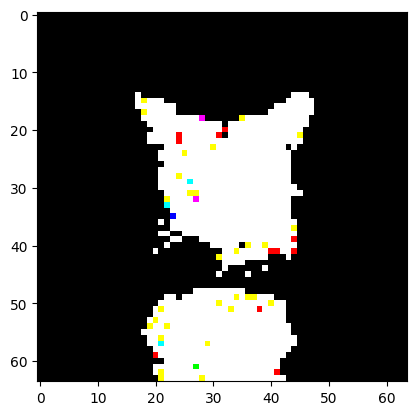

In [31]:
import requests
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# uncomment to get a random pic of a dog or cat
# url = "https://api.thecatapi.com/v1/images/search"
# response = requests.get(url)
# data = response.json()
# image_url = data[0]['url']
# img = requests.get(image_url)

# with open('test_image.jpg', 'wb') as f:
#     f.write(img.content)

test_image = image.load_img('test_image.jpg', target_size=(64, 64))

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)

cnn = load_model('cnn.h5')

result = cnn.predict(test_image)

print(result[0][0])

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

plt.imshow(test_image[0])
plt.show()